In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# INITIAL PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# DATA PREPROCESSING FOR MODEL FEEDING 

In [8]:
# DROPING THE ID COLUMN SINCE IT IS NOT USEFUL FOR MODELING 
df.drop('LoanID' ,axis = 1 , inplace=True)

In [9]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

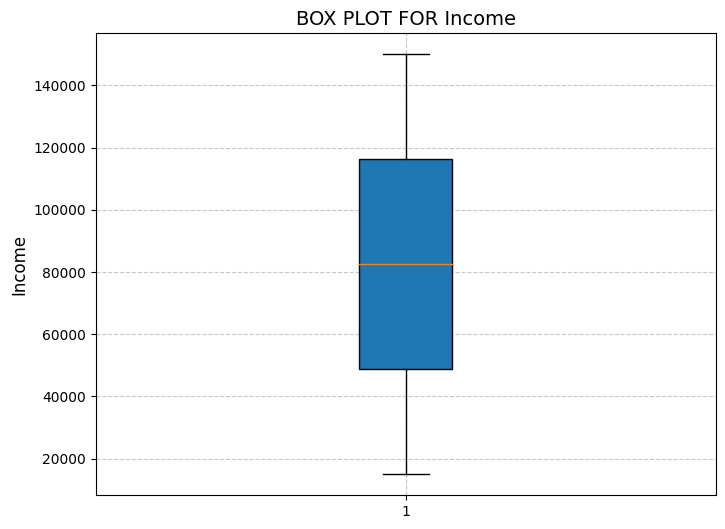

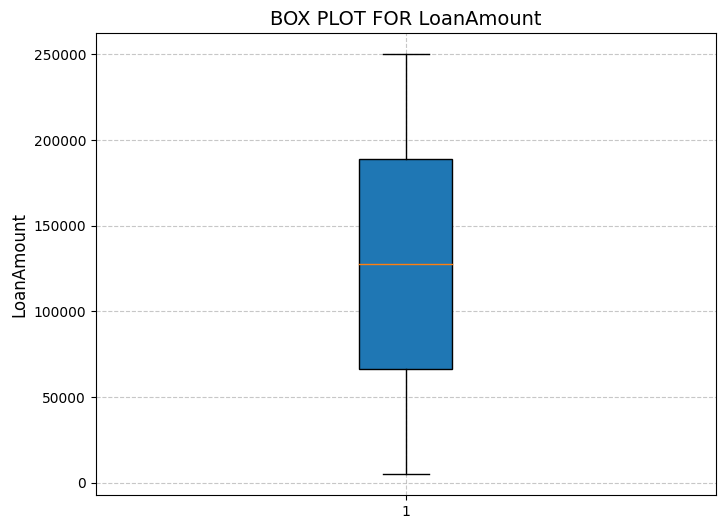

In [10]:
col = ['Income', 'LoanAmount']

# Loop through the columns and create box plots
for i in col:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[i], vert=True, patch_artist=True)
    plt.title(f'BOX PLOT FOR {i}', fontsize=14)
    plt.ylabel(i, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

AS YOU CAN SEE THERE ARE NO OULIERS IN THESE COLUMNS 


In [11]:
# FEATURES ENGINEERING 

df['LoanToIncomeRatio'] = df['LoanAmount'] / df['Income']
df['CreditUtilizationRate'] = df['LoanAmount'] / df['CreditScore']

In [12]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanToIncomeRatio,CreditUtilizationRate
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.588262,97.282692
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2.467481,271.703057
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534154,286.447894
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,1.412638,60.294751
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.447179,14.437599


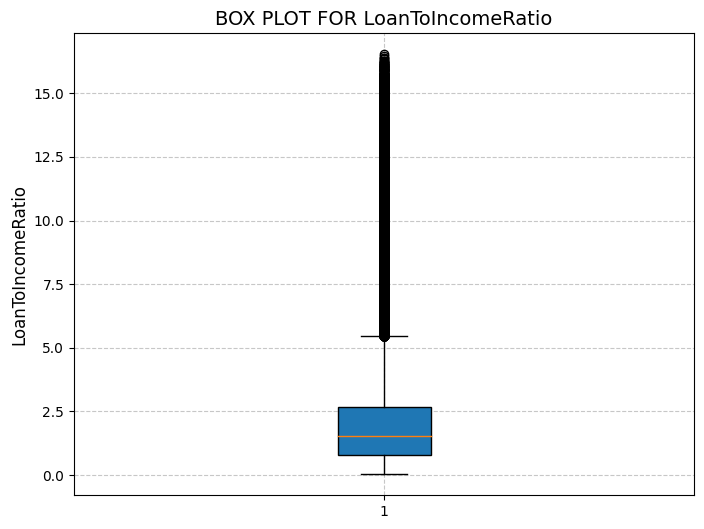

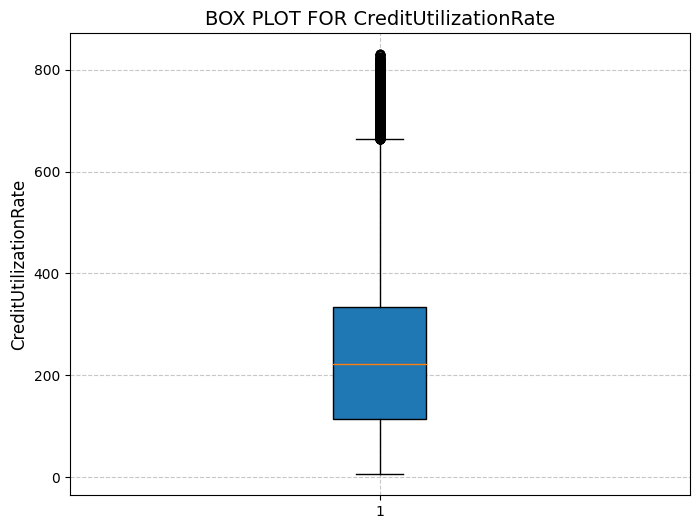

In [13]:
col = ['LoanToIncomeRatio' ,'CreditUtilizationRate']

for i in col:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[i], vert=True, patch_artist=True)
    plt.title(f'BOX PLOT FOR {i}', fontsize=14)
    plt.ylabel(i, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

## LABEL ENCODING FOR BINARY COLUMNS

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of binary columns
binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Apply LabelEncoder to binary columns
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

## ONE HOT ENCODING FOR CATEGORICAL COLUMNS 

In [15]:
# One-hot encoding categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(float)  # drop_first=True avoids multicollinearity

In [16]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  float64
 1   Income                        255347 non-null  float64
 2   LoanAmount                    255347 non-null  float64
 3   CreditScore                   255347 non-null  float64
 4   MonthsEmployed                255347 non-null  float64
 5   NumCreditLines                255347 non-null  float64
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  float64
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  float64
 10  HasDependents                 255347 non-null  float64
 11  HasCoSigner                   255347 non-null  float64
 12  Default                       255347 non-nul

## NUMERICAL FEATURES SCALING USING MINMAX SCALER 

In [18]:
# List of numerical columns to scale
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'LoanToIncomeRatio' , 'CreditUtilizationRate']

# Initialize scaler
scaler = MinMaxScaler()


# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  float64
 1   Income                        255347 non-null  float64
 2   LoanAmount                    255347 non-null  float64
 3   CreditScore                   255347 non-null  float64
 4   MonthsEmployed                255347 non-null  float64
 5   NumCreditLines                255347 non-null  float64
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  float64
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  float64
 10  HasDependents                 255347 non-null  float64
 11  HasCoSigner                   255347 non-null  float64
 12  Default                       255347 non-nul

In [20]:
df.isnull().sum()

Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
HasMortgage                     0
HasDependents                   0
HasCoSigner                     0
Default                         0
LoanToIncomeRatio               0
CreditUtilizationRate           0
Education_High School           0
Education_Master's              0
Education_PhD                   0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
dtype: int64

In [21]:
df.duplicated().sum()

0

NOW DATASET IS READY FOR THE FEEDING 

# MODELING 

In [22]:
# Split the dataset into features and target variable
X = df.drop('Default', axis=1)  # Features
y = df['Default']  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (204277, 26)
Testing set shape: (51070, 26)


Decision Tree Classifier:
Accuracy: 0.8034658312120618
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     45170
         1.0       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070



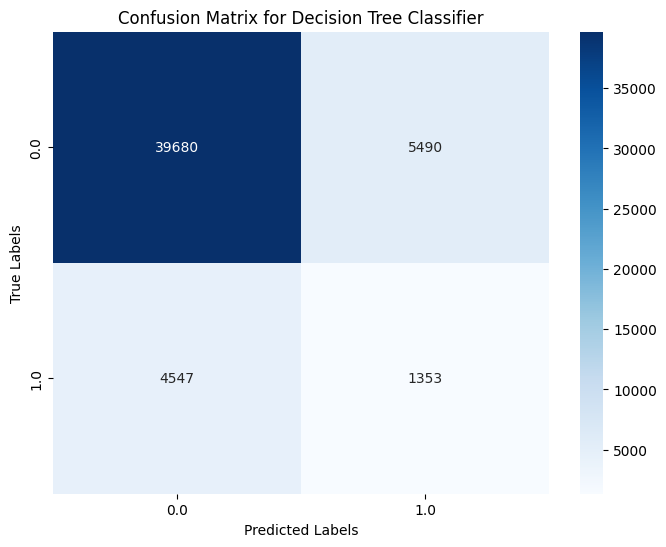

In [23]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("confusion_matrix_DecisionTree.png")  # Save the image
plt.show()  # Display the image

Random Forest Classifier:
Accuracy: 0.8866066183669473
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.62      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



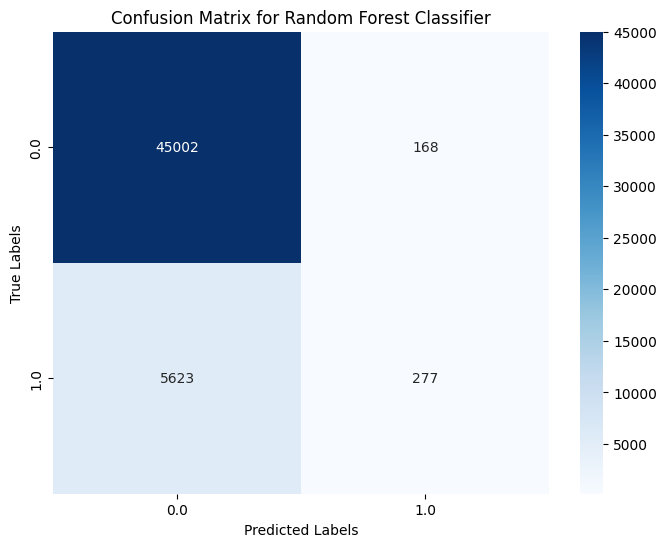

In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("confusion_matrix_RandomForest.png")  # Save the image
plt.show()  # Display the image

Gradient Boosting Classifier:
Accuracy: 0.887546504797337
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.64      0.06      0.11      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.53      0.53     51070
weighted avg       0.86      0.89      0.84     51070



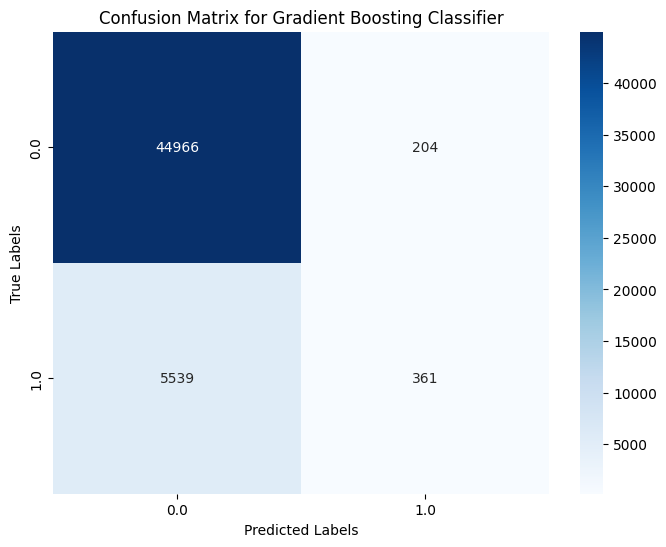

In [24]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, gb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("confusion_matrix_GradientBoosting.png")  # Save the image
plt.show()  # Display the image

XGBoost Classifier:
Accuracy: 0.8863716467593499
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     45170
         1.0       0.55      0.08      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



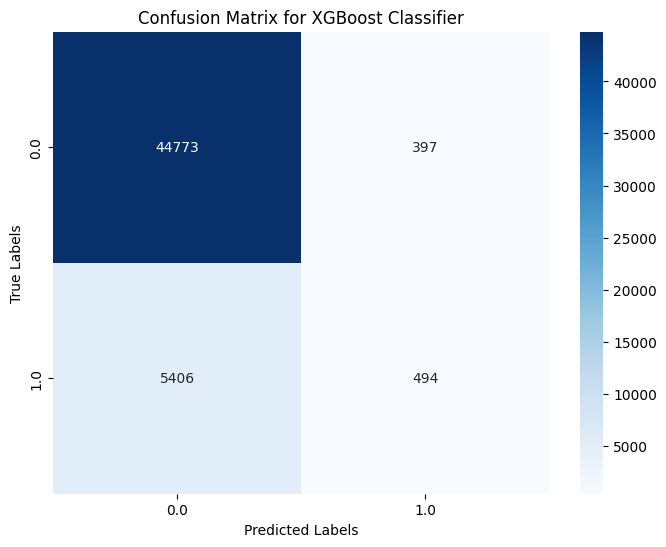

In [26]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("confusion_matrix_XGBoost.png")  # Save the image
plt.show()  # Display the image

CatBoost Classifier:
Accuracy: 0.8874290189935383
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     45170
         1.0       0.60      0.08      0.14      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.54      0.54     51070
weighted avg       0.86      0.89      0.85     51070



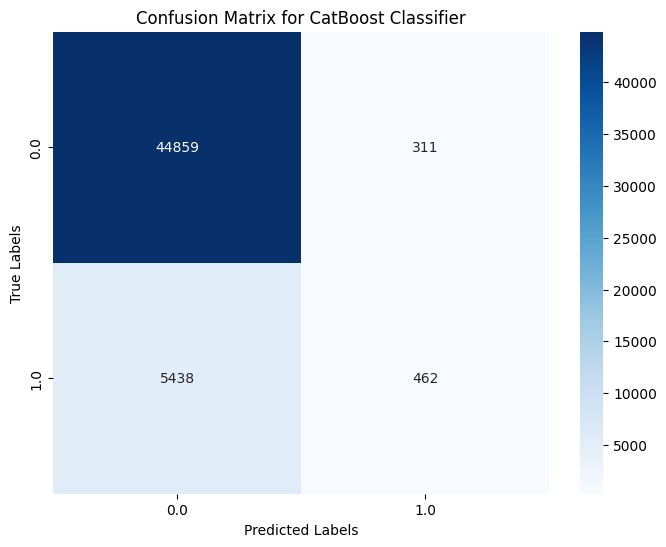

In [27]:
# CatBoost Classifier
cat_model = CatBoostClassifier(silent=True, random_state=42)
cat_model.fit(X_train, y_train)

# Predict on the test set
cat_predictions = cat_model.predict(X_test)

# Evaluation
print("CatBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, cat_predictions))
print("Classification Report:\n", classification_report(y_test, cat_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, cat_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("confusion_matrix_CatBoost.png")  # Save the image
plt.show()  # Display the image

In [28]:
# Performance summary
results = {
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "CatBoost"],
    "Accuracy": [
        accuracy_score(y_test, dt_predictions),
        accuracy_score(y_test, rf_predictions),
        accuracy_score(y_test, gb_predictions),
        accuracy_score(y_test, xgb_predictions),
        accuracy_score(y_test, cat_predictions)
    ]
}


results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Gradient Boosting,0.887547
4,CatBoost,0.887429
1,Random Forest,0.886607
3,XGBoost,0.886372
0,Decision Tree,0.803466


### SO GRADIENT BOOSTING IS ONE OF THE FINEST AND ACCURATE MODEL AMONG ALL THE MODELS

# LIME Explainations for GradientBoost Classifier 

In [ ]:
!pip install lime  

In [31]:
from lime.lime_tabular import LimeTabularExplainer

# Apply LIME for explanation
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Non-Defaulter', 'Defaulter'],  # Adjust class names as needed
    mode='classification'
)

# Explain a single instance
instance_index = 50
instance = X_test.iloc[instance_index]
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=gb_model.predict_proba
)

# Visualize explanation
explanation.show_in_notebook(show_table=True)

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/conda/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

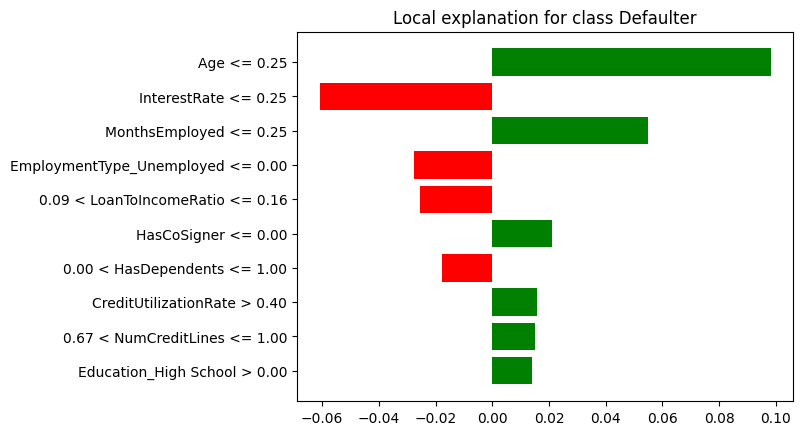

In [32]:
import matplotlib.pyplot as plt 
fig = explanation.as_pyplot_figure()
fig.savefig('lime_explanation2.png', bbox_inches='tight')
plt.show()